<a href="https://colab.research.google.com/github/neel0086/deep_learning/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import io
import tensorflow as tf
from tensorflow import keras
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
uploaded = files.upload()



Saving customer_churn.csv to customer_churn.csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['customer_churn.csv']))
df.drop('customerID',axis='columns',inplace=True)
df = pd.DataFrame(df)
pd.set_option("display.max_rows",100)
pd.set_option('display.max_columns',100)
print(df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [7]:
# REMOVING NOISE FROM THE DATA #
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
# Change to numeric data for Total Charges
df1 = df1.copy()
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

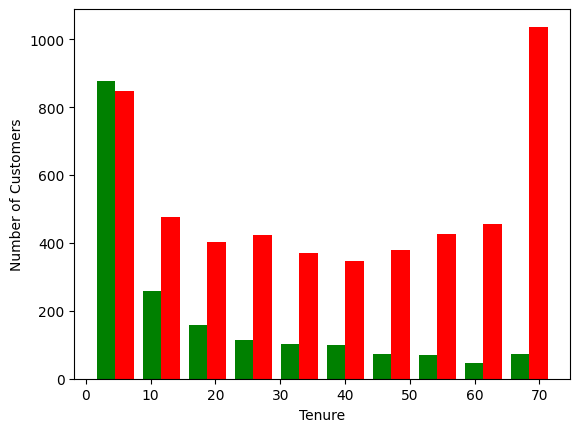

In [9]:
tenure_churn_no = df1[df1.Churn == "No"].tenure
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")

plt.hist([tenure_churn_yes, tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])

(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

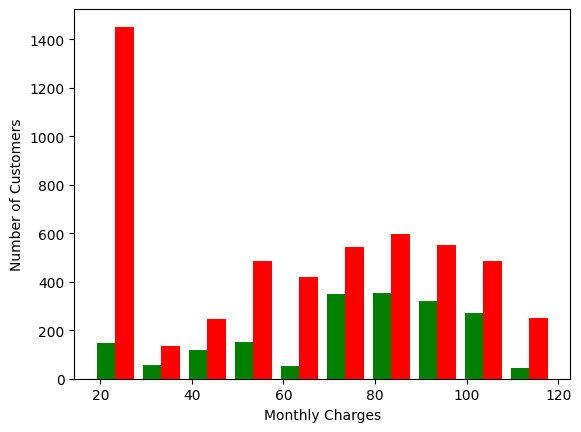

In [10]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")

plt.hist([mc_churn_yes, mc_churn_no],color=['green','red'],label=['MonthlyCharges=Yes','MonthlyCharges=No'])

In [11]:
# FETCHING UNIQUE DATA to analysis it and clean if needed
def print_unique_col_values(dff):
  for col in dff:
    if df[col].dtypes == 'object':
      print(f'{col} : {dff[col].unique()}')

In [12]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [13]:
#Data Cleanining
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)
print_unique_col_values(df1)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [30]:
col_name = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in col_name:
  df1[col].replace({"Yes":1,"No":0},inplace=True)

df1['gender'].replace({"Female":1,"Male":0},inplace=True)


In [31]:
print_unique_col_values(df1)

gender : [1 0]
Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [32]:
# One-Hot Encoding / Bitmap Index
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [33]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,0,1,1,0,0,0,0,0,1


In [34]:
X = df2.drop('Churn',axis='columns')
Y = df2["Churn"]

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5625, 26) (5625,)
(1407, 26) (1407,)


In [46]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation="relu"),          # As 26 columns are there so 26 features and hence 26 neurons
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

model.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics=['accuracy']

)
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
176/176 [==============================] - 1s 2ms/step - loss: 0.5085 - accuracy: 0.7527
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7963
Epoch 3/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8021
Epoch 4/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.7991
Epoch 5/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8020
Epoch 6/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8037
Epoch 7/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8037
Epoch 8/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8044
Epoch 9/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8052
Epoch 10/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4077 - accura

In [48]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.7541


[0.6034733057022095, 0.7540867328643799]